In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [130]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# (a)

Define a Convolutional Neural Network

modify it to take 3-channel images


In [131]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# create 5 simple dense nerual networks

In [132]:
# 0 hidden layers
class MultilayerPerceptron0(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, output_size)

    def forward(self, X):
        X = self.fc1(X)

        return X

In [133]:
# 1 hidden layer
class MultilayerPerceptron1(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, output_size)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.dropout(X)
        X = self.fc2(X)

        return X

In [134]:
# 2 hidden layers
class MultilayerPerceptron2(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, output_size)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.dropout(X)
        X = F.relu(self.fc2(X))
        X = self.dropout(X)
        X = self.fc3(X)

        return X

In [135]:
# 3 hidden layers
class MultilayerPerceptron3(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, output_size)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.dropout(X)
        X = F.relu(self.fc2(X))
        X = self.dropout(X)
        X = F.relu(self.fc3(X))
        X = self.dropout(X)
        X = self.fc4(X)

        return X

In [136]:
# 4 hidden layers
class MultilayerPerceptron4(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, output_size)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.dropout(X)
        X = F.relu(self.fc2(X))
        X = self.dropout(X)
        X = F.relu(self.fc3(X))
        X = self.dropout(X)
        X = F.relu(self.fc4(X))
        X = self.dropout(X)
        X = self.fc5(X)

        return X

In [137]:
model1 = MultilayerPerceptron0()
model1.cuda()
model2 = MultilayerPerceptron1()
model2.cuda()
model3 = MultilayerPerceptron2()
model3.cuda()
model4 = MultilayerPerceptron3()
model4.cuda()
model5 = MultilayerPerceptron4()
model5.cuda()

MultilayerPerceptron4(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [138]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

Train the network


# Code for collecting the loss calculated while training the model

In [139]:
def train(model, epoch):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    print('\nEpoch : %d'%epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        if model == net:
            outputs = model(inputs)
        else:
            outputs = model(inputs.view(inputs.size(0), -1))
            
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    print('Finished Training')

# Code for collecting the accuracy calculated while testing the model

In [140]:
models = {
    net: [],
    model1: [],
    model2: [],
    model3: [],
    model4: [],
    model5: [],
}

In [141]:
def test(model, epoch):
    model.eval()
    print('\nEpoch : %d'%epoch)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            # calculate outputs by running images through the network
            if model == net:
                outputs = model(images)
            else:
                outputs = model(images.view(images.size(0), -1))
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accu=100.*correct/total
    models[model].append(accu)
    
    print(f'Accuracy of the network on the 10000 test images: {accu} %')

In [142]:
epochs=10
for epoch in range(1,epochs+1): 
    train(net,epoch)
    test(net,epoch)

for epoch in range(1,epochs+1): 
    train(model1,epoch)
    test(model1,epoch)

for epoch in range(1,epochs+1): 
    train(model2,epoch)
    test(model2,epoch)

for epoch in range(1,epochs+1): 
    train(model3,epoch)
    test(model3,epoch)
    
for epoch in range(1,epochs+1): 
    train(model4,epoch)
    test(model4,epoch)
    
for epoch in range(1,epochs+1): 
    train(model5,epoch)
    test(model5,epoch)



Epoch : 1
[1,  2000] loss: 2.159
[1,  4000] loss: 1.816
[1,  6000] loss: 1.677
[1,  8000] loss: 1.590
[1, 10000] loss: 1.526
[1, 12000] loss: 1.489
Finished Training

Epoch : 1
Accuracy of the network on the 10000 test images: 45.6 %

Epoch : 2
[2,  2000] loss: 1.400
[2,  4000] loss: 1.356
[2,  6000] loss: 1.328
[2,  8000] loss: 1.307
[2, 10000] loss: 1.281
[2, 12000] loss: 1.264
Finished Training

Epoch : 2
Accuracy of the network on the 10000 test images: 54.58 %

Epoch : 3
[3,  2000] loss: 1.185
[3,  4000] loss: 1.196
[3,  6000] loss: 1.193
[3,  8000] loss: 1.156
[3, 10000] loss: 1.160
[3, 12000] loss: 1.159
Finished Training

Epoch : 3
Accuracy of the network on the 10000 test images: 59.64 %

Epoch : 4
[4,  2000] loss: 1.068
[4,  4000] loss: 1.071
[4,  6000] loss: 1.085
[4,  8000] loss: 1.099
[4, 10000] loss: 1.083
[4, 12000] loss: 1.069
Finished Training

Epoch : 4
Accuracy of the network on the 10000 test images: 61.25 %

Epoch : 5
[5,  2000] loss: 0.993
[5,  4000] loss: 0.995


Accuracy of the network on the 10000 test images: 47.33 %

Epoch : 6
[6,  2000] loss: 1.578
[6,  4000] loss: 1.560
[6,  6000] loss: 1.581
[6,  8000] loss: 1.593
[6, 10000] loss: 1.596
[6, 12000] loss: 1.579
Finished Training

Epoch : 6
Accuracy of the network on the 10000 test images: 46.5 %

Epoch : 7
[7,  2000] loss: 1.541
[7,  4000] loss: 1.566
[7,  6000] loss: 1.567
[7,  8000] loss: 1.577
[7, 10000] loss: 1.589
[7, 12000] loss: 1.557
Finished Training

Epoch : 7
Accuracy of the network on the 10000 test images: 47.7 %

Epoch : 8
[8,  2000] loss: 1.539
[8,  4000] loss: 1.558
[8,  6000] loss: 1.539
[8,  8000] loss: 1.546
[8, 10000] loss: 1.553
[8, 12000] loss: 1.568
Finished Training

Epoch : 8
Accuracy of the network on the 10000 test images: 45.63 %

Epoch : 9
[9,  2000] loss: 1.523
[9,  4000] loss: 1.544
[9,  6000] loss: 1.545
[9,  8000] loss: 1.542
[9, 10000] loss: 1.531
[9, 12000] loss: 1.522
Finished Training

Epoch : 9
Accuracy of the network on the 10000 test images: 46.04 %


In [143]:
models['CNN'] = models.pop(net)
models['Model 1'] = models.pop(model1)
models['Model 2'] = models.pop(model2)
models['Model 3'] = models.pop(model3)
models['Model 4'] = models.pop(model4)
models['Model 5'] = models.pop(model5)

In [145]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
torch.save(model1.state_dict(), PATH)
torch.save(model2.state_dict(), PATH)
torch.save(model3.state_dict(), PATH)
torch.save(model4.state_dict(), PATH)
torch.save(model5.state_dict(), PATH)


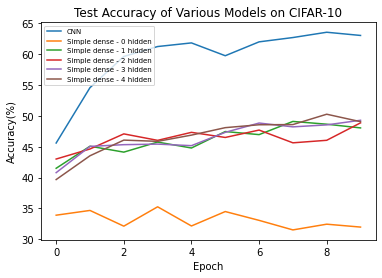

In [163]:
plt.plot(range(10), models['CNN'],label = 'CNN')
plt.plot(range(10), models['Model 1'],label = 'Simple dense - 0 hidden')
plt.plot(range(10), models['Model 2'],label = 'Simple dense - 1 hidden')
plt.plot(range(10), models['Model 3'],label = 'Simple dense - 2 hidden')
plt.plot(range(10), models['Model 4'],label = 'Simple dense - 3 hidden')
plt.plot(range(10), models['Model 5'],label = 'Simple dense - 4 hidden')
plt.title('Test Accuracy of Various Models on CIFAR-10')
plt.ylabel('Accuracy(%)')
plt.xlabel('Epoch')
plt.legend(loc='upper left',prop={'size': 7})

The CNN has the best accuracy, since it requires less parameters and have shared weights. Therefore, it is easier to train and requires less data to achieve high test accuracy. Furthermore, CNN is able to extract local features from the data while the fully connected neural networks cannot.

Then the fully connected neural networks with hidden layers all have similar test accuracy. Therefore, it is hard to conclude how many hidden layers are the optimal choice. 

The fully connected neural networks with no hidden layers has the worst test accuracy, by a lot. This is due to the fact that there are no non-linear activation functions in the model so this is basically a linear transformation. And since our data points, which are the images in CIFAR10 are probably not linearly separable, we would have poor results. Therefore, at least one hidden layer with activation function should be added to include non-linearity in the model. 

# (b)


create CNN using sigmoid units

In [165]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


net1 = Net1()
net1.cuda()
models[net1] = []

modify train and test functions

In [166]:
def train(model, epoch):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    print('\nEpoch : %d'%epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        if model == net or net1:
            outputs = model(inputs)
        else:
            outputs = model(inputs.view(inputs.size(0), -1))
            
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    print('Finished Training')

In [167]:
def test(model, epoch):
    model.eval()
    print('\nEpoch : %d'%epoch)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            # calculate outputs by running images through the network
            if model == net or net1:
                outputs = model(images)
            else:
                outputs = model(images.view(images.size(0), -1))
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accu=100.*correct/total
    models[model].append(accu)
    
    print(f'Accuracy of the network on the 10000 test images: {accu} %')

In [168]:
epochs=10
for epoch in range(1,epochs+1): 
    train(net1,epoch)
    test(net1,epoch)


Epoch : 1
[1,  2000] loss: 2.313
[1,  4000] loss: 2.314
[1,  6000] loss: 2.313
[1,  8000] loss: 2.313
[1, 10000] loss: 2.311
[1, 12000] loss: 2.310
Finished Training

Epoch : 1
Accuracy of the network on the 10000 test images: 10.0 %

Epoch : 2
[2,  2000] loss: 2.309
[2,  4000] loss: 2.309
[2,  6000] loss: 2.309
[2,  8000] loss: 2.309
[2, 10000] loss: 2.307
[2, 12000] loss: 2.307
Finished Training

Epoch : 2
Accuracy of the network on the 10000 test images: 10.0 %

Epoch : 3
[3,  2000] loss: 2.306
[3,  4000] loss: 2.307
[3,  6000] loss: 2.306
[3,  8000] loss: 2.306
[3, 10000] loss: 2.306
[3, 12000] loss: 2.305
Finished Training

Epoch : 3
Accuracy of the network on the 10000 test images: 10.0 %

Epoch : 4
[4,  2000] loss: 2.306
[4,  4000] loss: 2.306
[4,  6000] loss: 2.305
[4,  8000] loss: 2.305
[4, 10000] loss: 2.305
[4, 12000] loss: 2.305
Finished Training

Epoch : 4
Accuracy of the network on the 10000 test images: 10.0 %

Epoch : 5
[5,  2000] loss: 2.304
[5,  4000] loss: 2.304
[5,

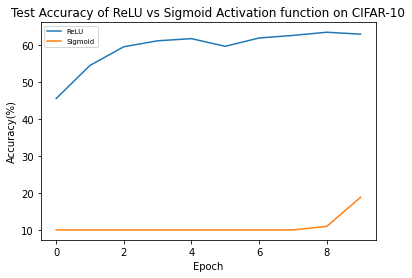

In [169]:
models['CNN1'] = models.pop(net1)
plt.plot(range(epochs), models['CNN'],label = 'ReLU')
plt.plot(range(epochs), models['CNN1'],label = 'Sigmoid')
plt.title('Test Accuracy of ReLU vs Sigmoid Activation function on CIFAR-10')
plt.ylabel('Accuracy(%)')
plt.xlabel('Epoch')
plt.legend(loc='upper left',prop={'size': 7})


In [170]:
import pickle
#save all the information in a dictionary
pickle_out = open("dict.pickle","wb")
pickle.dump(models, pickle_out)
pickle_out.close()

pickle_in = open("dict.pickle","rb")
models = pickle.load(pickle_in)

As we can see from the graph, ReLU activation function has far better test accuracy compared to sigmoid activation function. This is due to the fact that ReLU has reduced likelihood of the gradient to vanish. For ReLU, when an input > 0, the gradient has a constant value. However, for sigmoid, the gradient becomes increasingly small as the absolute value of the input increases. This causes the weight to barely change, as we can see that the accuracy for the sigmoid activation function model lacks improvement for the first few epochs. 

# (c)

In [31]:
# no data augmentation
transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# include data augmentation
transform2 = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(size=32, padding=4),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset1 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform1)
trainloader1 = torch.utils.data.DataLoader(trainset1, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform1)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

trainset2 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform2)
trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# testset2 = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform2)
# testloader2 = torch.utils.data.DataLoader(testset2, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


# modify models, train and test functions


In [32]:
# model with dropout
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


m_without_dp = Net()
m_with_dp = Net2()
m_without_dp.cuda()
m_with_dp.cuda()

Net2(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [33]:
def train(model, epoch,trainload,lst):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    print('\nEpoch : %d'%epoch)
    correct = 0
    total = 0
    for i, data in enumerate(trainload, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
         
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()    
    accu=100.*correct/total
    lst.append(accu)
    print('Finished Training')
    
    print(f'Accuracy of the network on the 50000 train images: {accu} %')

In [34]:
def test(model, epoch,testload,lst):
    model.eval()
    print('\nEpoch : %d'%epoch)
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testload:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accu=100.*correct/total
    lst.append(accu)
    
    
    print(f'Accuracy of the network on the 10000 test images: {accu} %')

In [35]:
train_a_d = []
test_a_d = []
train_na_d = []
test_na_d = []
train_a_nd = []
test_a_nd = []
train_na_nd = []
test_na_nd = []


In [36]:
epochs=100
for epoch in range(1,epochs+1): 
    #no augment no dropout
    train(m_without_dp,epoch,trainloader1, train_na_nd)
    test(m_without_dp,epoch,testloader,test_na_nd)
    
for epoch in range(1,epochs+1):     
    #with augment no dropout
    train(m_without_dp,epoch,trainloader2, train_a_nd)
    test(m_without_dp,epoch,testloader,test_a_nd)
    
for epoch in range(1,epochs+1): 
    #no augment with dropout
    train(m_with_dp,epoch,trainloader1, train_na_d)
    test(m_with_dp,epoch,testloader,test_na_d)
    
for epoch in range(1,epochs+1): 
    #with augment and droupout
    train(m_with_dp,epoch,trainloader2, train_a_d)
    test(m_with_dp,epoch,testloader,test_a_d)


Epoch : 1
Finished Training
Accuracy of the network on the 50000 train images: 36.464 %

Epoch : 1
Accuracy of the network on the 10000 test images: 47.94 %

Epoch : 2
Finished Training
Accuracy of the network on the 50000 train images: 52.016 %

Epoch : 2
Accuracy of the network on the 10000 test images: 54.41 %

Epoch : 3
Finished Training
Accuracy of the network on the 50000 train images: 57.708 %

Epoch : 3
Accuracy of the network on the 10000 test images: 56.92 %

Epoch : 4
Finished Training
Accuracy of the network on the 50000 train images: 61.032 %

Epoch : 4
Accuracy of the network on the 10000 test images: 58.78 %

Epoch : 5
Finished Training
Accuracy of the network on the 50000 train images: 63.59 %

Epoch : 5
Accuracy of the network on the 10000 test images: 62.07 %

Epoch : 6
Finished Training
Accuracy of the network on the 50000 train images: 65.262 %

Epoch : 6
Accuracy of the network on the 10000 test images: 61.74 %

Epoch : 7
Finished Training
Accuracy of the network 

Accuracy of the network on the 10000 test images: 58.08 %

Epoch : 53
Finished Training
Accuracy of the network on the 50000 train images: 79.616 %

Epoch : 53
Accuracy of the network on the 10000 test images: 57.33 %

Epoch : 54
Finished Training
Accuracy of the network on the 50000 train images: 79.77 %

Epoch : 54
Accuracy of the network on the 10000 test images: 58.35 %

Epoch : 55
Finished Training
Accuracy of the network on the 50000 train images: 79.478 %

Epoch : 55
Accuracy of the network on the 10000 test images: 58.44 %

Epoch : 56
Finished Training
Accuracy of the network on the 50000 train images: 79.914 %

Epoch : 56
Accuracy of the network on the 10000 test images: 58.32 %

Epoch : 57
Finished Training
Accuracy of the network on the 50000 train images: 79.828 %

Epoch : 57
Accuracy of the network on the 10000 test images: 57.74 %

Epoch : 58
Finished Training
Accuracy of the network on the 50000 train images: 80.192 %

Epoch : 58
Accuracy of the network on the 10000 test

Finished Training
Accuracy of the network on the 50000 train images: 50.06 %

Epoch : 4
Accuracy of the network on the 10000 test images: 57.13 %

Epoch : 5
Finished Training
Accuracy of the network on the 50000 train images: 51.116 %

Epoch : 5
Accuracy of the network on the 10000 test images: 57.26 %

Epoch : 6
Finished Training
Accuracy of the network on the 50000 train images: 51.652 %

Epoch : 6
Accuracy of the network on the 10000 test images: 59.04 %

Epoch : 7
Finished Training
Accuracy of the network on the 50000 train images: 52.75 %

Epoch : 7
Accuracy of the network on the 10000 test images: 59.19 %

Epoch : 8
Finished Training
Accuracy of the network on the 50000 train images: 53.228 %

Epoch : 8
Accuracy of the network on the 10000 test images: 58.85 %

Epoch : 9
Finished Training
Accuracy of the network on the 50000 train images: 54.026 %

Epoch : 9
Accuracy of the network on the 10000 test images: 58.75 %

Epoch : 10
Finished Training
Accuracy of the network on the 5000

Accuracy of the network on the 10000 test images: 64.54 %

Epoch : 56
Finished Training
Accuracy of the network on the 50000 train images: 61.07 %

Epoch : 56
Accuracy of the network on the 10000 test images: 63.88 %

Epoch : 57
Finished Training
Accuracy of the network on the 50000 train images: 60.948 %

Epoch : 57
Accuracy of the network on the 10000 test images: 63.85 %

Epoch : 58
Finished Training
Accuracy of the network on the 50000 train images: 61.022 %

Epoch : 58
Accuracy of the network on the 10000 test images: 65.08 %

Epoch : 59
Finished Training
Accuracy of the network on the 50000 train images: 61.21 %

Epoch : 59
Accuracy of the network on the 10000 test images: 63.5 %

Epoch : 60
Finished Training
Accuracy of the network on the 50000 train images: 61.388 %

Epoch : 60
Accuracy of the network on the 10000 test images: 63.73 %

Epoch : 61
Finished Training
Accuracy of the network on the 50000 train images: 61.41 %

Epoch : 61
Accuracy of the network on the 10000 test im

Finished Training
Accuracy of the network on the 50000 train images: 52.406 %

Epoch : 7
Accuracy of the network on the 10000 test images: 56.03 %

Epoch : 8
Finished Training
Accuracy of the network on the 50000 train images: 53.48 %

Epoch : 8
Accuracy of the network on the 10000 test images: 57.65 %

Epoch : 9
Finished Training
Accuracy of the network on the 50000 train images: 53.944 %

Epoch : 9
Accuracy of the network on the 10000 test images: 57.83 %

Epoch : 10
Finished Training
Accuracy of the network on the 50000 train images: 54.51 %

Epoch : 10
Accuracy of the network on the 10000 test images: 57.75 %

Epoch : 11
Finished Training
Accuracy of the network on the 50000 train images: 54.872 %

Epoch : 11
Accuracy of the network on the 10000 test images: 57.15 %

Epoch : 12
Finished Training
Accuracy of the network on the 50000 train images: 55.178 %

Epoch : 12
Accuracy of the network on the 10000 test images: 55.61 %

Epoch : 13
Finished Training
Accuracy of the network on th

Accuracy of the network on the 10000 test images: 59.75 %

Epoch : 59
Finished Training
Accuracy of the network on the 50000 train images: 58.7 %

Epoch : 59
Accuracy of the network on the 10000 test images: 60.54 %

Epoch : 60
Finished Training
Accuracy of the network on the 50000 train images: 59.006 %

Epoch : 60
Accuracy of the network on the 10000 test images: 59.61 %

Epoch : 61
Finished Training
Accuracy of the network on the 50000 train images: 58.46 %

Epoch : 61
Accuracy of the network on the 10000 test images: 58.73 %

Epoch : 62
Finished Training
Accuracy of the network on the 50000 train images: 58.676 %

Epoch : 62
Accuracy of the network on the 10000 test images: 59.96 %

Epoch : 63
Finished Training
Accuracy of the network on the 50000 train images: 58.388 %

Epoch : 63
Accuracy of the network on the 10000 test images: 57.95 %

Epoch : 64
Finished Training
Accuracy of the network on the 50000 train images: 58.67 %

Epoch : 64
Accuracy of the network on the 10000 test im

Finished Training
Accuracy of the network on the 50000 train images: 44.512 %

Epoch : 10
Accuracy of the network on the 10000 test images: 56.55 %

Epoch : 11
Finished Training
Accuracy of the network on the 50000 train images: 45.75 %

Epoch : 11
Accuracy of the network on the 10000 test images: 49.87 %

Epoch : 12
Finished Training
Accuracy of the network on the 50000 train images: 45.356 %

Epoch : 12
Accuracy of the network on the 10000 test images: 53.4 %

Epoch : 13
Finished Training
Accuracy of the network on the 50000 train images: 45.088 %

Epoch : 13
Accuracy of the network on the 10000 test images: 54.53 %

Epoch : 14
Finished Training
Accuracy of the network on the 50000 train images: 45.5 %

Epoch : 14
Accuracy of the network on the 10000 test images: 55.69 %

Epoch : 15
Finished Training
Accuracy of the network on the 50000 train images: 45.392 %

Epoch : 15
Accuracy of the network on the 10000 test images: 56.42 %

Epoch : 16
Finished Training
Accuracy of the network on

Accuracy of the network on the 10000 test images: 58.31 %

Epoch : 62
Finished Training
Accuracy of the network on the 50000 train images: 48.674 %

Epoch : 62
Accuracy of the network on the 10000 test images: 54.22 %

Epoch : 63
Finished Training
Accuracy of the network on the 50000 train images: 48.568 %

Epoch : 63
Accuracy of the network on the 10000 test images: 57.67 %

Epoch : 64
Finished Training
Accuracy of the network on the 50000 train images: 48.928 %

Epoch : 64
Accuracy of the network on the 10000 test images: 56.23 %

Epoch : 65
Finished Training
Accuracy of the network on the 50000 train images: 48.582 %

Epoch : 65
Accuracy of the network on the 10000 test images: 54.82 %

Epoch : 66
Finished Training
Accuracy of the network on the 50000 train images: 48.546 %

Epoch : 66
Accuracy of the network on the 10000 test images: 58.28 %

Epoch : 67
Finished Training
Accuracy of the network on the 50000 train images: 48.76 %

Epoch : 67
Accuracy of the network on the 10000 test

In [39]:
results = [train_a_d, test_a_d, train_na_d, test_na_d, train_a_nd, test_a_nd, train_na_nd, test_na_nd]

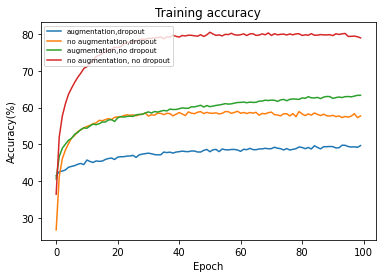

In [175]:
plt.plot(range(epochs), train_a_d,label = 'augmentation,dropout')
plt.plot(range(epochs), train_na_d,label = 'no augmentation,dropout')
plt.plot(range(epochs), train_a_nd,label = 'augmentation,no dropout')
plt.plot(range(epochs), train_na_nd,label = 'no augmentation, no dropout')
plt.title('Training accuracy')
plt.ylabel('Accuracy(%)')
plt.xlabel('Epoch')
plt.legend(loc='upper left',prop={'size': 7})

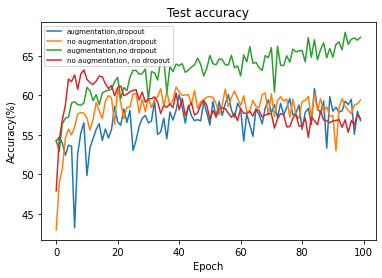

In [176]:
plt.plot(range(epochs), test_a_d,label = 'augmentation,dropout')
plt.plot(range(epochs), test_na_d,label = 'no augmentation,dropout')
plt.plot(range(epochs), test_a_nd,label = 'augmentation,no dropout')
plt.plot(range(epochs), test_na_nd,label = 'no augmentation, no dropout')
plt.title('Test accuracy')
plt.ylabel('Accuracy(%)')
plt.xlabel('Epoch')
plt.legend(loc='upper left',prop={'size': 7})

In [51]:
pickle_out = open("dict1.pickle","wb")
pickle.dump(results, pickle_out)
pickle_out.close()

pickle_in = open("dict1.pickle","rb")
results = pickle.load(pickle_in)

For training, the CNN without augmentation and without dropout has the best accuracy. However, it overfits the training data the most. The accuracy decreases and it has the worst accuracy as we increase the number of epochs for our testing data. 

Since both dropout and data augmentation are used to prevent overfitting and improve generalization, it makes sense that the other neural networks have worse training accuracy and better test accuracy. We can see that data augmentation improves the test accuracy significantly. Dropout also improves the test accuracy when there is no data augmentation, but it becomes slightly less accurate when data augmentation is added. 